In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import constants as C
import langevin as L 

%matplotlib widget

Sweep from -1.24V to -1.74V. Maximum relative residual: 4.11750e-05.
Sweep from -1.24V to -1.24V. Maximum relative residual: 4.11750e-05.
Sweep from -1.24V to -1.74V. Maximum relative residual: 1.08170e-05.
Sweep from -1.24V to -1.24V. Maximum relative residual: 7.42313e-06.
Sweep from -1.24V to -1.74V. Maximum relative residual: 1.02484e-05.
Sweep from -1.24V to -1.24V. Maximum relative residual: 6.25822e-06.
Sweep from -1.24V to -1.74V. Maximum relative residual: 9.91563e-06.
Sweep from -1.24V to -1.24V. Maximum relative residual: 3.46609e-06.


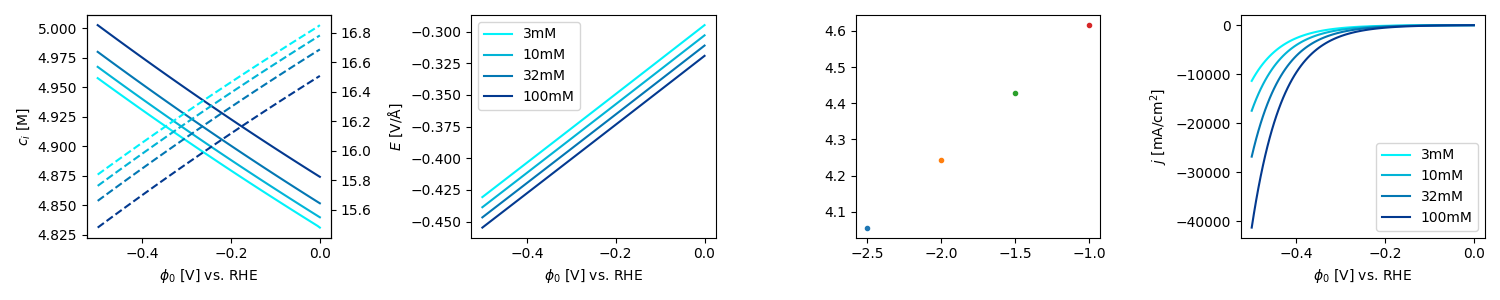

In [15]:
## Au -- Goyal/Koper concentration series
gamma = 8
p_h = 13
e_eq_she = -59e-3 * p_h 
e_pzc_she = 0.474
e_range_she = e_eq_she + np.linspace(-0.5, 0, 100)
cat_conc_range = np.logspace(-2.5, -1, 4) #

k=1/C.BETA/6.626e-34*C.E_0
f=C.E_0*C.BETA

red = np.linspace(3, 2, len(cat_conc_range))[::-1]
gre = np.linspace(57, 242, len(cat_conc_range))[::-1]
blu = np.linspace(143, 250, len(cat_conc_range))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), sharex=False)

ax_h2o = ax[0].twinx()

for i, c_cat in enumerate(cat_conc_range): 
    model = edl.Abrashkin(c_cat, gamma, gamma)
    sol = model.potential_sweep(e_range_she - e_pzc_she)

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)

    efield = np.zeros(e_range_she.shape)
    h2o_0 = np.zeros(e_range_she.shape)
    cat_0 = np.zeros(e_range_she.shape)
    for i, e in enumerate(e_range_she):
        efield[i] = sol.profiles[i].efield[0]
        cat_0[i] = sol.profiles[i].c_dict[r'Cations'][0]
        h2o_0[i] = sol.profiles[i].c_dict[r'Solvent'][0]

    ax[0].plot(sol.phi+e_pzc_she-e_eq_she, cat_0, label=f'{c_cat*1e3:.0f}mM', color=rgb)
    ax_h2o.plot(sol.phi+e_pzc_she-e_eq_she, h2o_0, '--', label=f'{c_cat*1e3:.0f}mM', color=rgb)
    ax[1].plot(sol.phi+e_pzc_she-e_eq_she, efield*1e-10, color=rgb, label=f'{c_cat*1e3:.0f}mM')

    j = -k * 1 * np.exp(-0.5*f * C.D_ADSORBATE_LAYER * efield) 

    # ax[2].plot(-j, e_range_she-e_eq_she, color=rgb)
    ax[2].plot(np.log10(c_cat), np.log10(np.abs(j))[0], '.')

    ax[3].plot(e_range_she-e_eq_she, j, label=f'{c_cat*1e3:.0f}mM', color=rgb)

ax[3].legend()
ax[1].legend()
ax[0].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[1].set_xlabel(r'$\phi_0$ [V] vs. RHE')
# ax[2].set_ylabel(r'$\phi_0$ [V] vs. RHE')
ax[0].set_ylabel(r'$c_i$ [M]')
ax[1].set_ylabel(r'$E$ [V/Å]')
# ax[2].set_xlabel(r'$-j$ [mA/cm$^2$]')
# ax[2].set_xscale('log')
ax[3].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[3].set_ylabel(r'$j$ [mA/cm$^2$]')

plt.tight_layout()


Sweep from 0.00V to -1.94V. Maximum relative residual: 3.63535e-05.
Sweep from 0.00V to -1.94V. Maximum relative residual: 3.63070e-05.
Sweep from 0.00V to -1.94V. Maximum relative residual: 3.63057e-05.
Sweep from 0.00V to -1.94V. Maximum relative residual: 3.66191e-05.
Sweep from 0.00V to -1.84V. Maximum relative residual: 3.63535e-05.
Sweep from 0.00V to -1.84V. Maximum relative residual: 3.63070e-05.
Sweep from 0.00V to -1.84V. Maximum relative residual: 3.63057e-05.
Sweep from 0.00V to -1.84V. Maximum relative residual: 3.66191e-05.
Sweep from 0.00V to -1.74V. Maximum relative residual: 3.63535e-05.
Sweep from 0.00V to -1.74V. Maximum relative residual: 3.63070e-05.
Sweep from 0.00V to -1.74V. Maximum relative residual: 3.63057e-05.
Sweep from 0.00V to -1.74V. Maximum relative residual: 3.66191e-05.
Sweep from 0.00V to -1.64V. Maximum relative residual: 3.63535e-05.
Sweep from 0.00V to -1.64V. Maximum relative residual: 3.63070e-05.
Sweep from 0.00V to -1.64V. Maximum relative res

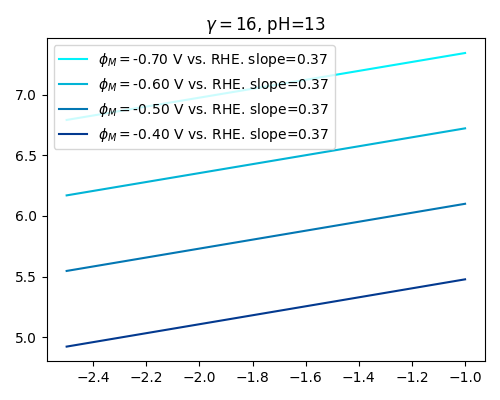

In [16]:
## Au -- Monteiro/Goyal/Koper concentration/potential loglog plots
gamma = 16
p_h = 13
e_eq_she = -59e-3 * p_h 
e_pzc_she = 0.474
e_range_she = e_eq_she + np.linspace(-0.7, -0.4, 4)
cat_conc_range = np.logspace(-2.5, -1, 4) #

k=1/C.BETA/6.626e-34*C.E_0
f=C.E_0*C.BETA

red = np.linspace(3, 2, len(e_range_she))[::-1]
gre = np.linspace(57, 242, len(e_range_she))[::-1]
blu = np.linspace(143, 250, len(e_range_she))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False)

for i, e in enumerate(e_range_she): 
    current = np.zeros(cat_conc_range.shape)
    for j, c_cat in enumerate(cat_conc_range):
        model = edl.Abrashkin(c_cat, gamma, gamma)
        sol = model.spatial_profiles(e - e_pzc_she, p_h=p_h)

        efield = sol.efield[0]
        cat_0 = sol.c_dict[r'Cations'][0]
        h2o_0 = sol.c_dict[r'Solvent'][0] + cat_0 * (gamma - 8)

        current[j] = k * np.exp(-0.5*f * C.D_ADSORBATE_LAYER * efield) * h2o_0

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)
    y = np.log10(current)
    x = np.log10(cat_conc_range)
    p = np.polyfit(x, y, 1)
    ax.plot(x, y, label=rf'$\phi_M=${e - e_eq_she:.2f} V vs. RHE. slope={p[0]:.2f}', color=rgb)

ax.set_title(rf'$\gamma=${gamma}, pH={p_h}')
ax.legend()
plt.tight_layout()


No such comm: 000d804b6b40453a828296c2d3f8e39a


Sweep from -1.72V to -1.92V. Maximum relative residual: 3.01358e-04.
Sweep from -1.72V to -1.72V. Maximum relative residual: 3.01358e-04.
Sweep from -1.72V to -1.92V. Maximum relative residual: 1.74795e-05.
Sweep from -1.72V to -1.72V. Maximum relative residual: 1.74795e-05.
Sweep from -1.72V to -1.92V. Maximum relative residual: 4.13628e-06.
Sweep from -1.72V to -1.72V. Maximum relative residual: 3.75424e-06.
Sweep from -1.72V to -1.92V. Maximum relative residual: 4.15798e-06.
Sweep from -1.72V to -1.72V. Maximum relative residual: 3.70040e-06.
Sweep from -1.72V to -1.92V. Maximum relative residual: 4.17801e-06.
Sweep from -1.72V to -1.72V. Maximum relative residual: 3.71200e-06.


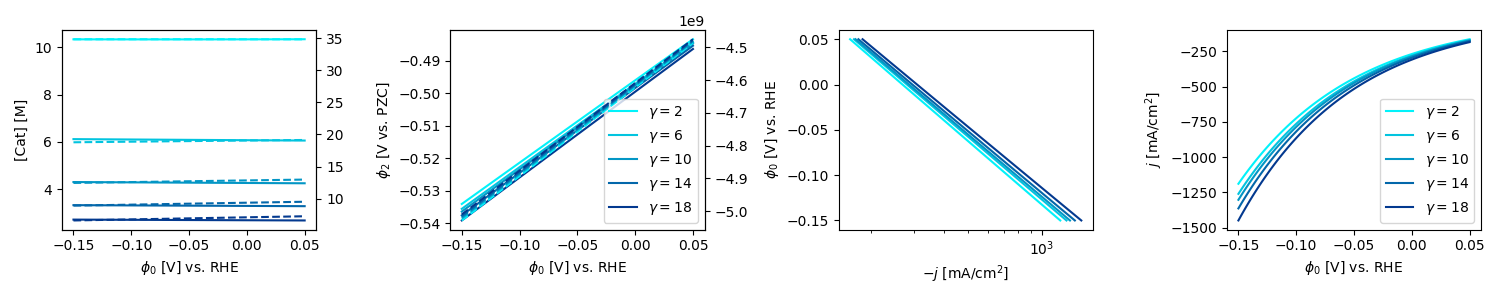

No such comm: 42b31a28af554784a462752e24c9e996


In [14]:
# Pt -- Bender ion size series
gamma_range = [2, 6, 10, 14, 18]
p_h = 13
e_eq_she = -59e-3 * p_h 
e_pzc_she = 1 # 0.474
e_range_she = e_eq_she + np.linspace(-0.15, 0.05, 100)
c_cat = 100e-3

k=1/C.BETA/6.626e-34*C.E_0
f=C.E_0*C.BETA

red = np.linspace(3, 2, len(gamma_range))[::-1]
gre = np.linspace(57, 242, len(gamma_range))[::-1]
blu = np.linspace(143, 250, len(gamma_range))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), sharex=False)

ax_h2o = ax[0].twinx()
ax_efield = ax[1].twinx()

for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(c_cat, gamma, gamma)
    sol = model.potential_sweep(e_range_she - e_pzc_she)

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)

    phi_2 = np.zeros(e_range_she.shape)
    efield = np.zeros(e_range_she.shape)
    h2o_0 = np.zeros(e_range_she.shape)
    cat_0 = np.zeros(e_range_she.shape)
    for i, e in enumerate(e_range_she):
        phi_2[i] = sol.profiles[i].phi[0] 
        efield[i] = sol.profiles[i].efield[0]
        cat_0[i] = sol.profiles[i].c_dict[r'Cations'][0]
        h2o_0[i] = sol.profiles[i].c_dict[r'Solvent'][0]

    ax[0].plot(sol.phi+e_pzc_she-e_eq_she, cat_0, label=rf'$\gamma=${gamma:.0f}', color=rgb)
    ax_h2o.plot(sol.phi+e_pzc_she-e_eq_she, h2o_0, '--', label=rf'$\gamma=${gamma:.0f}', color=rgb)
    ax[1].plot(sol.phi+e_pzc_she-e_eq_she, phi_2, color=rgb, label=rf'$\gamma=${gamma:.0f}')
    ax_efield.plot(sol.phi+e_pzc_she-e_eq_she, efield, '--', color=rgb, label=rf'$\gamma=${gamma:.0f}')

    j = -k * 1 * np.exp(-f * phi_2) 
    
    ax[2].plot(-j, e_range_she-e_eq_she, color=rgb)

    ax[3].plot(e_range_she-e_eq_she, j, label=rf'$\gamma=${gamma:.0f}', color=rgb)

ax[3].legend()
ax[1].legend()
ax[0].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[1].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[2].set_ylabel(r'$\phi_0$ [V] vs. RHE')
ax[0].set_ylabel(r'[Cat] [M]')
ax[1].set_ylabel(r'$\phi_2$ [V vs. PZC]')
ax[2].set_xlabel(r'$-j$ [mA/cm$^2$]')
ax[2].set_xscale('log')
ax[3].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[3].set_ylabel(r'$j$ [mA/cm$^2$]')

plt.tight_layout()


Sweep from -1.64V to -2.04V. Maximum relative residual: 4.88156e-06.
Sweep from -1.64V to -1.64V. Maximum relative residual: 9.83936e-07.
Sweep from -1.64V to -2.04V. Maximum relative residual: 3.83622e-06.
Sweep from -1.64V to -1.64V. Maximum relative residual: 2.85845e-06.
Sweep from -1.64V to -2.04V. Maximum relative residual: 4.87027e-06.
Sweep from -1.64V to -1.64V. Maximum relative residual: 3.54582e-06.
Sweep from -1.64V to -2.04V. Maximum relative residual: 4.83450e-06.
Sweep from -1.64V to -1.64V. Maximum relative residual: 3.52365e-06.
Sweep from -1.64V to -2.04V. Maximum relative residual: 4.82488e-06.
Sweep from -1.64V to -1.64V. Maximum relative residual: 3.54056e-06.


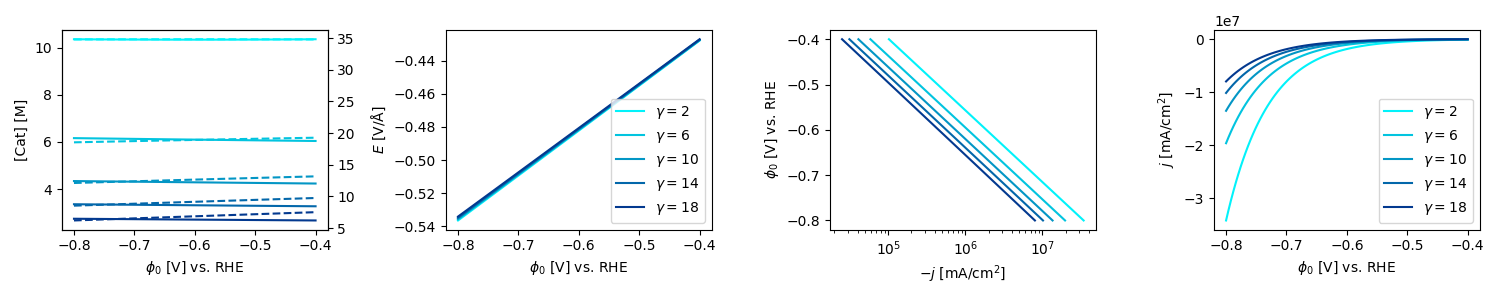

No such comm: 8b22cdae97d440ebb59e8573a34023ad


In [11]:
## Au -- Bender ion size series
gamma_range = [2, 6, 10, 14, 18]
p_h = 13
e_eq_she = -59e-3 * p_h 
e_pzc_she = 0.474
e_range_she = e_eq_she + np.linspace(-0.8, -0.4, 100)
c_cat = 100e-3

k=1/C.BETA/6.626e-34*C.E_0
f=C.E_0*C.BETA

red = np.linspace(3, 2, len(gamma_range))[::-1]
gre = np.linspace(57, 242, len(gamma_range))[::-1]
blu = np.linspace(143, 250, len(gamma_range))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), sharex=False)

ax_h2o = ax[0].twinx()

for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(c_cat, gamma, gamma)
    sol = model.potential_sweep(e_range_she - e_pzc_she)

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)

    efield = np.zeros(e_range_she.shape)
    h2o_0 = np.zeros(e_range_she.shape)
    cat_0 = np.zeros(e_range_she.shape)
    for i, e in enumerate(e_range_she):
        efield[i] = sol.profiles[i].efield[0]
        cat_0[i] = sol.profiles[i].c_dict[r'Cations'][0]
        h2o_0[i] = sol.profiles[i].c_dict[r'Solvent'][0]

    ax[0].plot(sol.phi+e_pzc_she-e_eq_she, cat_0, label=rf'$\gamma=${gamma:.0f}', color=rgb)
    ax_h2o.plot(sol.phi+e_pzc_she-e_eq_she, h2o_0, '--', label=rf'$\gamma=${gamma:.0f}', color=rgb)
    ax[1].plot(sol.phi+e_pzc_she-e_eq_she, efield*1e-10, color=rgb, label=rf'$\gamma=${gamma:.0f}')

    j = -k * 1 * np.exp(-0.5*f * C.D_ADSORBATE_LAYER * efield) * cat_0

    ax[2].plot(-j, e_range_she-e_eq_she, color=rgb)

    ax[3].plot(e_range_she-e_eq_she, j, label=rf'$\gamma=${gamma:.0f}', color=rgb)

ax[3].legend()
ax[1].legend()
ax[0].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[1].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[2].set_ylabel(r'$\phi_0$ [V] vs. RHE')
ax[0].set_ylabel(r'[Cat] [M]')
ax[1].set_ylabel(r'$E$ [V/Å]')
ax[2].set_xlabel(r'$-j$ [mA/cm$^2$]')
ax[2].set_xscale('log')
ax[3].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[3].set_ylabel(r'$j$ [mA/cm$^2$]')
plt.tight_layout()


No such comm: 6c08dc5db8c647a1930c46ac0176c2e5


Sweep from -1.06V to -1.56V. Maximum relative residual: 1.30215e-05.
Sweep from -1.06V to -1.06V. Maximum relative residual: 3.14382e-06.
Sweep from -1.12V to -1.62V. Maximum relative residual: 1.17125e-05.
Sweep from -1.12V to -1.12V. Maximum relative residual: 2.28121e-06.
Sweep from -1.18V to -1.68V. Maximum relative residual: 1.73024e-05.
Sweep from -1.18V to -1.18V. Maximum relative residual: 1.73024e-05.
Sweep from -1.24V to -1.74V. Maximum relative residual: 9.91563e-06.
Sweep from -1.24V to -1.24V. Maximum relative residual: 3.46609e-06.


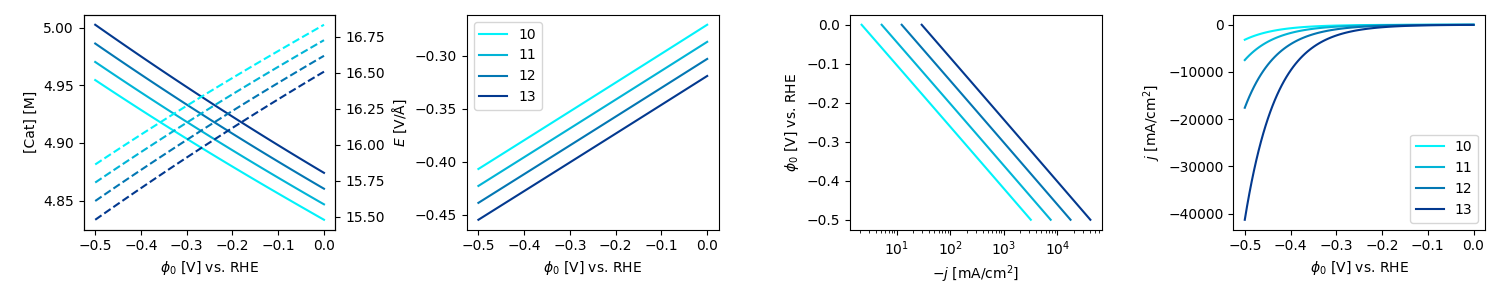

No such comm: 2714ccb718df4f399716e96d63c13b51


In [6]:
## Goyal&Koper -- pH series
gamma = 8
p_h_range = [10, 11, 12, 13]
e_pzc_she = 0.474
c_cat = 100e-3 

k=1/C.BETA/6.626e-34*C.E_0
f=C.E_0*C.BETA

red = np.linspace(3, 2, len(p_h_range))[::-1]
gre = np.linspace(57, 242, len(p_h_range))[::-1]
blu = np.linspace(143, 250, len(p_h_range))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), sharex=False)

ax_h2o = ax[0].twinx()

for i, p_h in enumerate(p_h_range): 
    e_eq_she = -59e-3 * p_h 
    e_range_she = e_eq_she + np.linspace(-0.5, 0, 100)

    model = edl.Abrashkin(c_cat, gamma, gamma)
    sol = model.potential_sweep(e_range_she - e_pzc_she)

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)

    efield = np.zeros(e_range_she.shape)
    h2o_0 = np.zeros(e_range_she.shape)
    cat_0 = np.zeros(e_range_she.shape)
    for i, e in enumerate(e_range_she):
        efield[i] = sol.profiles[i].efield[0]
        cat_0[i] = sol.profiles[i].c_dict[r'Cations'][0]
        h2o_0[i] = sol.profiles[i].c_dict[r'Solvent'][0]

    ax[0].plot(sol.phi+e_pzc_she-e_eq_she, cat_0, label=f'{p_h:.0f}', color=rgb)
    ax_h2o.plot(sol.phi+e_pzc_she-e_eq_she, h2o_0, '--', label=f'{p_h:.0f}', color=rgb)
    ax[1].plot(sol.phi+e_pzc_she-e_eq_she, efield*1e-10, color=rgb, label=f'{p_h:.0f}')

    j = -k * 1 * np.exp(-0.5*f * C.D_ADSORBATE_LAYER * efield) 


    ax[2].plot(-j, e_range_she-e_eq_she, color=rgb)

    ax[3].plot(e_range_she-e_eq_she, j, label=f'{p_h:.0f}', color=rgb)

ax[3].legend()
ax[1].legend()
ax[0].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[1].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[2].set_ylabel(r'$\phi_0$ [V] vs. RHE')
ax[0].set_ylabel(r'[Cat] [M]')
ax[1].set_ylabel(r'$E$ [V/Å]')
ax[2].set_xlabel(r'$-j$ [mA/cm$^2$]')
ax[2].set_xscale('log')
ax[3].set_xlabel(r'$\phi_0$ [V] vs. RHE')
ax[3].set_ylabel(r'$j$ [mA/cm$^2$]')

plt.tight_layout()
